# Example: Simulating a gas network model stored in the extended 3DCityDB

This example shows how to extract the information about a gas network stored in the 3DCityDB and create a simulation model for [pandangas](https://github.com/IntegrCiTy/PandaNGas) from it.

## Connecting to the database

Define connection parameters.

In [1]:
from dblayer import *

connect = PostgreSQLConnectionInfo(
    user = 'postgres',
    pwd = 'postgres',
    host = 'localhost',
    port = '5432',
    dbname = 'citydb'
    )

Create an instance of class `PandaNGasModelDBReader`.

In [2]:
from dblayer.sim.pandangas import *

pg_reader = PandaNGasModelDBReader( connect )

## Creating the simulation model

Retrieve the simulation model.

In [3]:
net = pg_reader.get_net( network_id = 3000 )

Inspect the simulation model.

In [4]:
net

This pandangas network includes the following parameter tables:
   - bus (5 elements)
   - pipe (4 elements)
   - feeder (1 element)
   - load (2 elements)
   - station (1 element)

## Using the simulation model

Calculate the pressure and mass flow in the network.

In [5]:
import pandangas.simulation as sim

p_nodes, m_dot_pipes, m_dot_nodes, gas = sim._run_sim( net, level = 'BP' )

Plot the results.

<IPython.core.display.Javascript object>


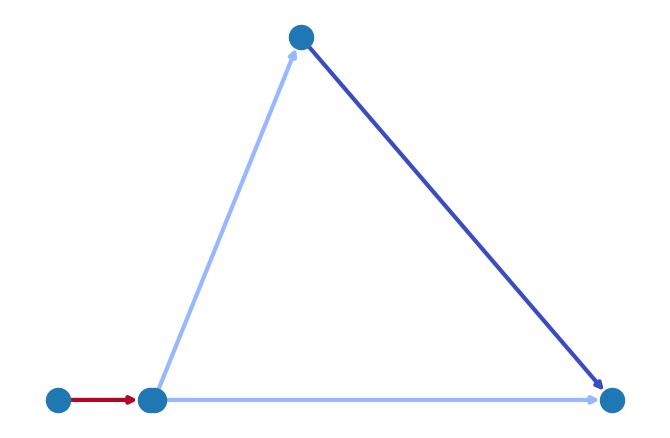

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx

from pandangas.topology import create_nxgraph

nodes_pos = { n.name: pg_reader.geom_to_point2d( n.geom ).list() for n in pg_reader.network_nodes }
edge_color_list = [ 1, 1, 1e3*m_dot_pipes['pipe-N1-N2'], 1e3*m_dot_pipes['pipe-N1-N3'], 1e3*m_dot_pipes['pipe-N2-N3'] ]

nx.draw( create_nxgraph( net ), nodes_pos, edge_color=edge_color_list, edge_cmap=plt.cm.coolwarm, width=3 )

plt.show()

Done.